# 01 -Tendencias de Vendas

## 03 Analise de Vendas

### Alucar - Analisando as vendas

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
alucar = pd.read_csv('dados/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f" A quantidade de linhas e colunas é : {alucar.shape}")

 A quantidade de linhas e colunas é : (24, 2)


In [5]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

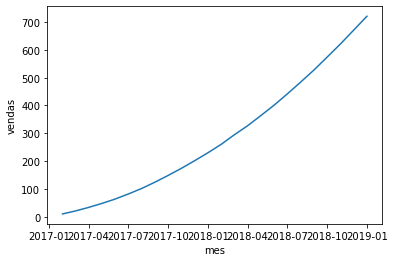

In [10]:
sns.lineplot(x='mes',y='vendas',data = alucar)

### 04 Aperfeiçoando o grafico

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

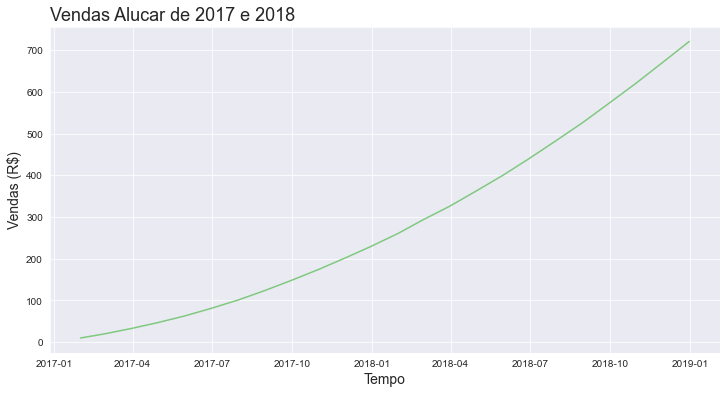

In [12]:
ax = sns.lineplot(x='mes',y='vendas',data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018',loc ='left',fontsize = 18)
ax.set_xlabel('Tempo',fontsize = 14)
ax.set_ylabel('Vendas (R$)',fontsize = 14)
ax = ax

# 02- Decomposicao e autocorrelação

## 01 - Decompondo as vendas

In [13]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [14]:
alucar['Aumento'] = alucar['vendas'].diff()

In [15]:
alucar.head()

,mes,vendas,Aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


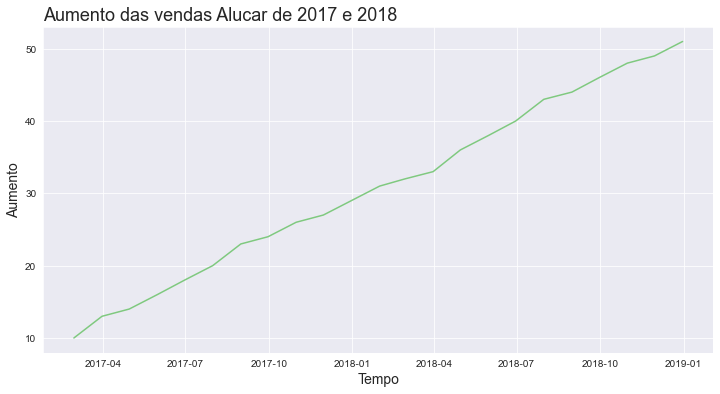

In [16]:
ax = sns.lineplot(x='mes',y='Aumento',data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018',loc ='left',fontsize = 18)
ax.set_xlabel('Tempo',fontsize = 14)
ax.set_ylabel('Aumento',fontsize = 14)
ax = ax

### Criando uma função para plotar grafico

In [17]:
def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x = x,y = y,data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc ='left',fontsize = 18)
    ax.set_xlabel(labelx,fontsize = 14)
    ax.set_ylabel(labely,fontsize = 14)
    ax = ax

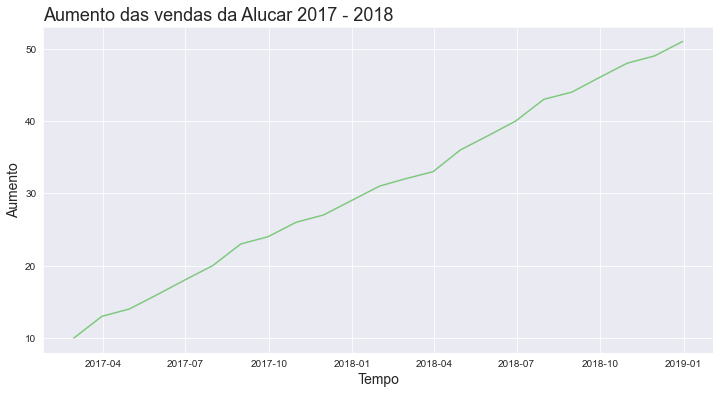

In [18]:
plotar('Aumento das vendas da Alucar 2017 - 2018', 'Tempo', 'Aumento',
      'mes','Aumento',alucar)

In [19]:
alucar['aceleracao'] = alucar['Aumento'].diff()
alucar.head()

,mes,vendas,Aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


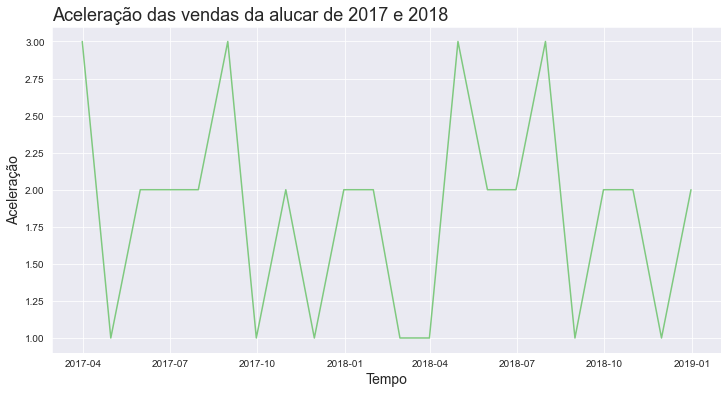

In [20]:
plotar('Aceleração das vendas da alucar de 2017 e 2018','Tempo','Aceleração','mes','aceleracao',alucar)

## 02 - Observação e Tendência

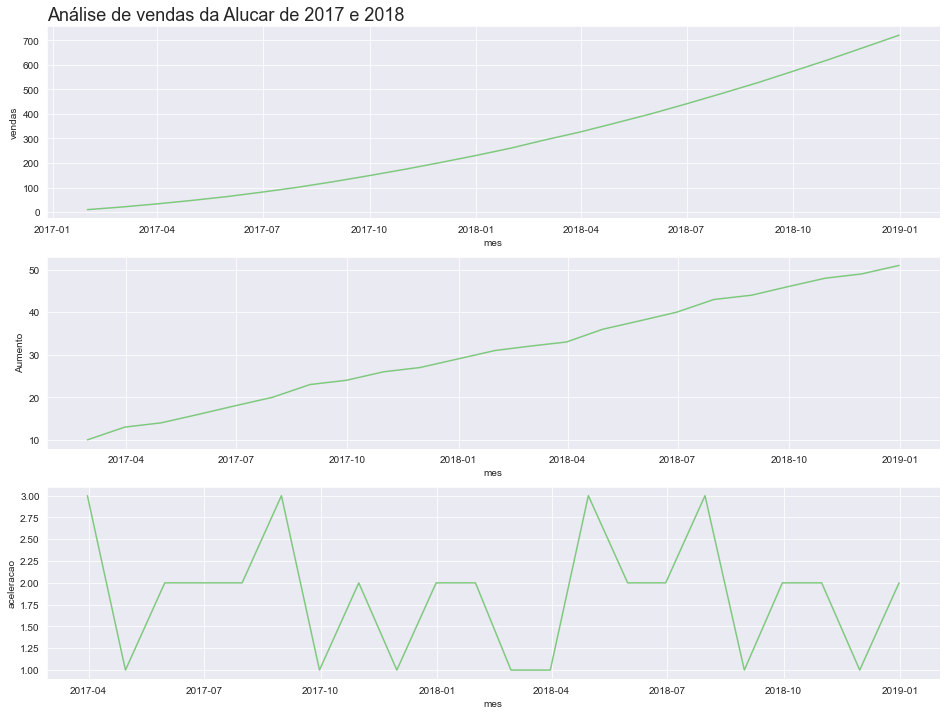

In [21]:
plt.figure(figsize = (16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize = 18, loc ='left')
sns.lineplot(x='mes',y='vendas',data = alucar)
plt.subplot(3,1,2)
ax = sns.lineplot(x='mes',y='Aumento',data = alucar)
plt.subplot(3,1,3)
ax = sns.lineplot(x='mes',y='aceleracao',data = alucar)
ax = ax

In [22]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize = (16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc ='left')
    sns.lineplot(x= x,y=y1,data = dataset)
    plt.subplot(3,1,2)
    ax = sns.lineplot(x=x,y=y2,data = dataset)
    plt.subplot(3,1,3)
    ax = sns.lineplot(x=x,y=y3,data = dataset)
    ax = ax

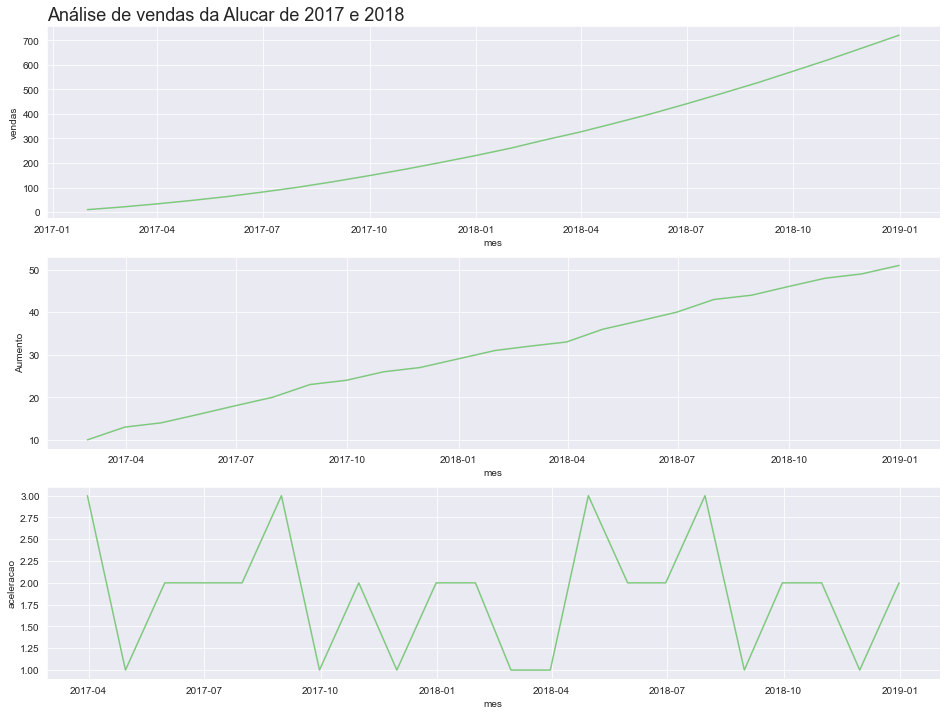

In [23]:
plot_comparacao('mes','vendas','Aumento','aceleracao',
                alucar,'Análise de vendas da Alucar de 2017 e 2018' )

## 03 - Autocorrelação

In [24]:
from pandas.plotting import autocorrelation_plot

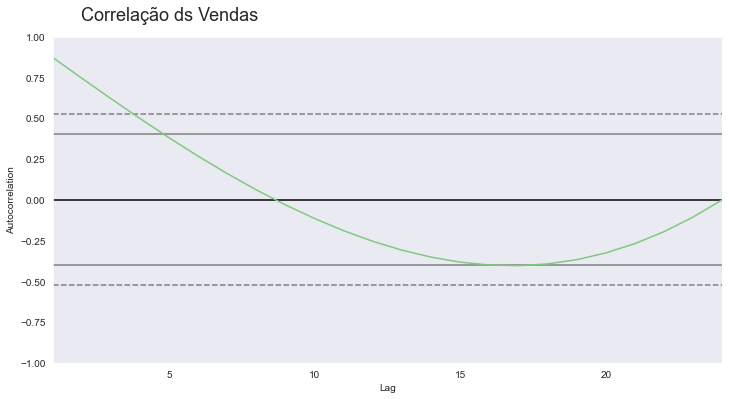

In [25]:
ax = plt.figure(figsize =(12,6))
ax.suptitle('Correlação ds Vendas', fontsize = 18, x=0.26,y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

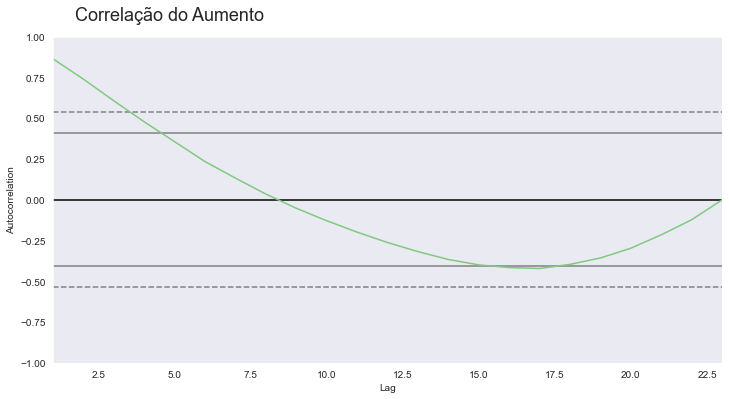

In [26]:
ax = plt.figure(figsize =(12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x=0.26,y=0.95)
autocorrelation_plot(alucar['Aumento'][1:])
ax = ax

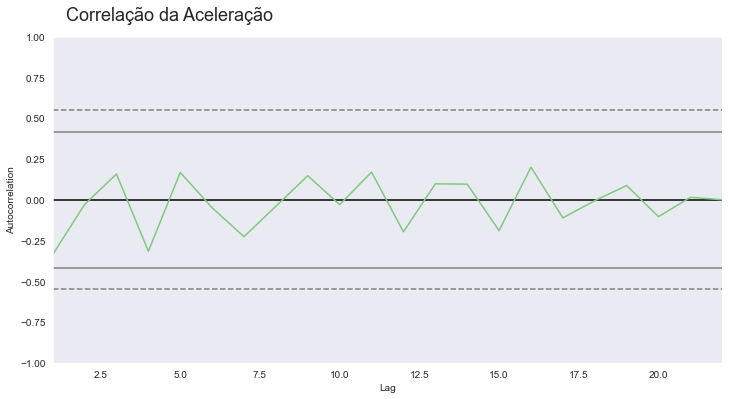

In [27]:
ax = plt.figure(figsize =(12,6))
ax.suptitle('Correlação da Aceleração', fontsize = 18, x=0.26,y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# 03 - Importância da decomposição e sazonalidade

## 01 - Analisando assinantes

### Alucar - analisando assinantes da newsletter

In [28]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [29]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [30]:
assinantes.shape

(24, 2)

In [31]:
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [32]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [33]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


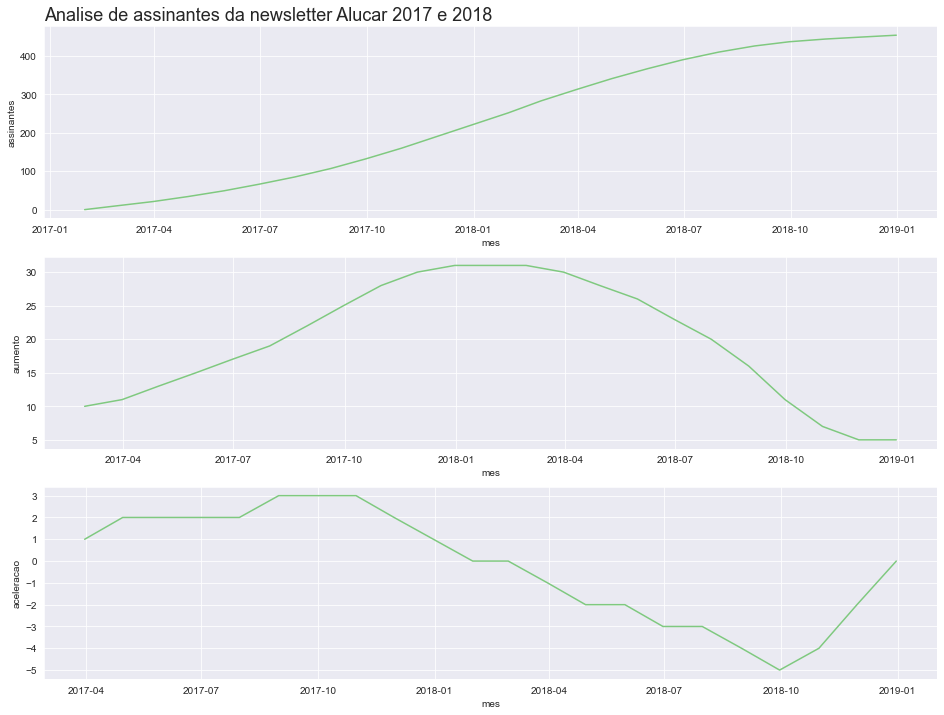

In [34]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Analise de assinantes da newsletter Alucar 2017 e 2018')

## 02 - Sazonalidade e Chocolate

In [35]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [36]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [37]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [38]:
chocolura.shape

(24, 2)

In [39]:
chocolura.isna().sum()

mes       0
vendas    0
dtype: int64

In [40]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


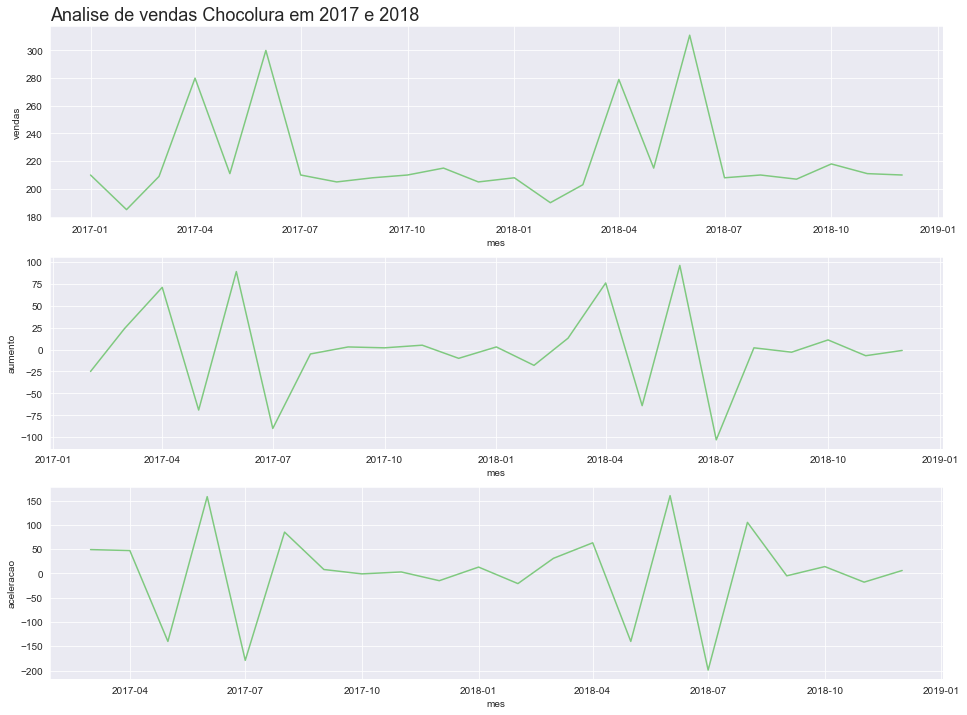

In [41]:
plot_comparacao('mes','vendas','aumento','aceleracao',chocolura,
                'Analise de vendas Chocolura em 2017 e 2018')

## Investigando a sazonalidade

### Chocolura vendas diárias ( Outubro e Novembro)

In [42]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [43]:
vendas_por_dia.shape

(61, 2)

In [44]:
vendas_por_dia.isna().sum()

dia       0
vendas    0
dtype: int64

In [45]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [46]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [47]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [48]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


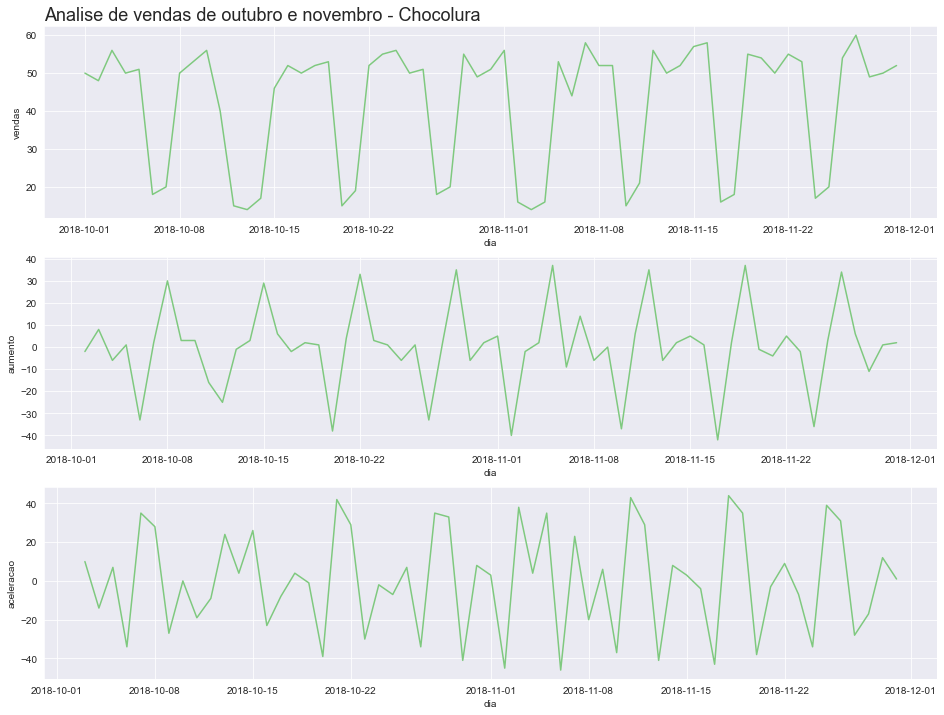

In [49]:
plot_comparacao('dia','vendas','aumento','aceleracao',
                vendas_por_dia,'Analise de vendas de outubro e novembro - Chocolura')

### Analisando a sazonalidade

In [50]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [51]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [52]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [53]:
dias_traduzidos = {'Monday': 'segunda', 'Tuesday':'terça',
                   'Wednesday':'quarta', 'Thursday':'quinta',
                   'Friday':'sexta', 'Saturday':'sabado',
                   'Sunday':'domingo'}

In [54]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [55]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terça
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo
7,2018-10-08,50,30.0,28.0,segunda
8,2018-10-09,53,3.0,-27.0,terça
9,2018-10-10,56,3.0,0.0,quarta


### Agrupando os dias

In [56]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas','aumento','aceleracao']].mean().round()

In [57]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terça,52.0,-1.0,-34.0


# 04 - Normalização e statsmodels

## Autocorrelação das vendas

### Correlação das vendas diárias

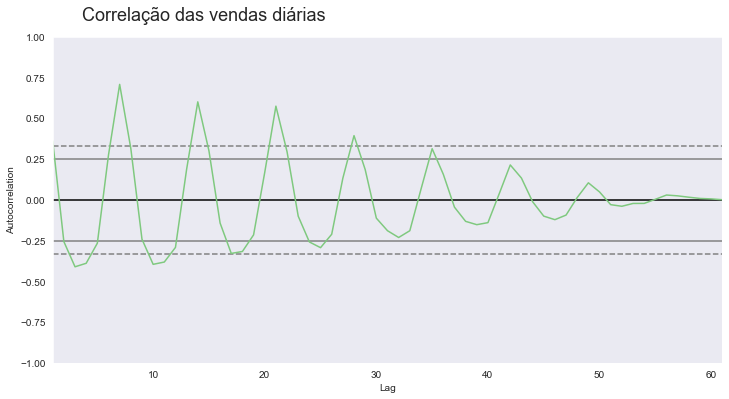

In [58]:
ax = plt.figure(figsize =(12,6))
ax.suptitle('Correlação das vendas diárias',fontsize = 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

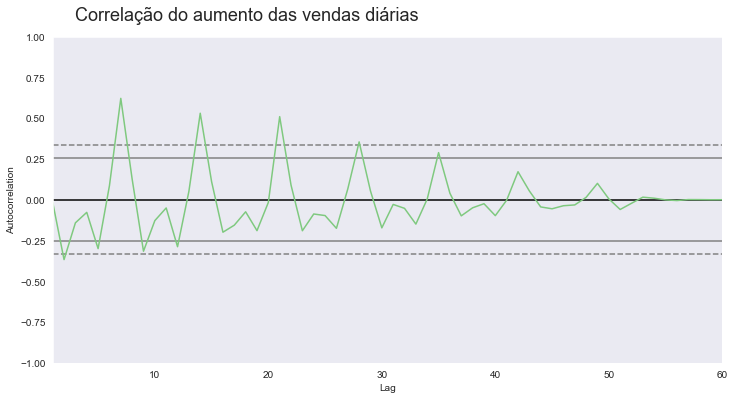

In [59]:
ax = plt.figure(figsize =(12,6))
ax.suptitle('Correlação do aumento das vendas diárias',fontsize = 18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

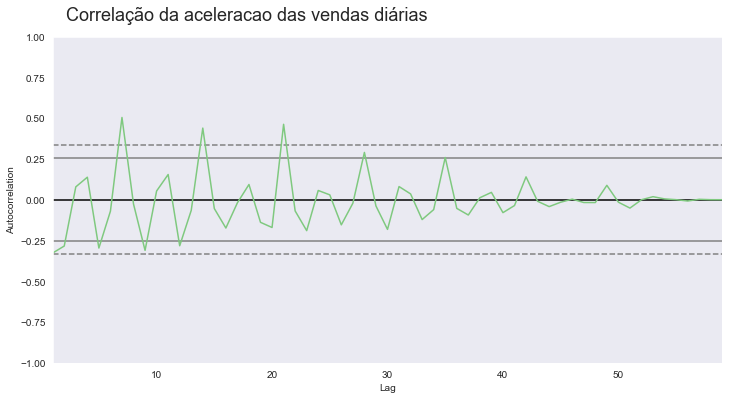

In [60]:
ax = plt.figure(figsize =(12,6))
ax.suptitle('Correlação da aceleracao das vendas diárias',fontsize = 18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

## Normalização

### Cafelura- analise de vendas

In [61]:
cafelura = pd.read_csv('dados/cafelura.csv')

In [62]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [63]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [64]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [65]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [66]:
print(f'Quantidade de linhas e colunas {cafelura.shape}')
print(f'Quantidade  de dados nulos : {cafelura.isna().sum().sum()}')

Quantidade de linhas e colunas (24, 2)
Quantidade  de dados nulos : 0


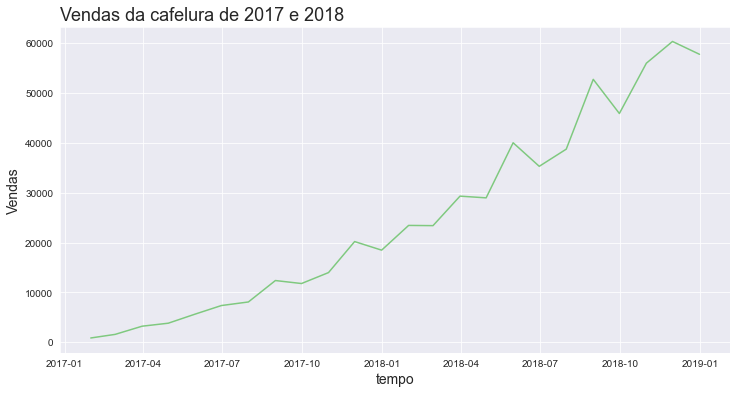

In [67]:
plotar('Vendas da cafelura de 2017 e 2018','tempo','Vendas','mes','vendas',cafelura)

In [68]:
quantidade_dias_fim_de_semana = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_dias_fim_de_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [69]:
quantidade_dias_fim_de_semana['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [70]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_dias_fim_de_semana['quantidade_de_dias'].values

In [71]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


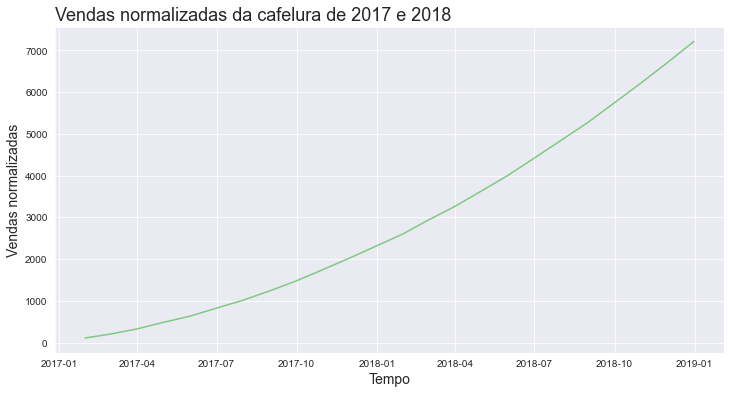

In [72]:
plotar('Vendas normalizadas da cafelura de 2017 e 2018', 'Tempo','Vendas normalizadas','mes','vendas_normalizadas',cafelura)

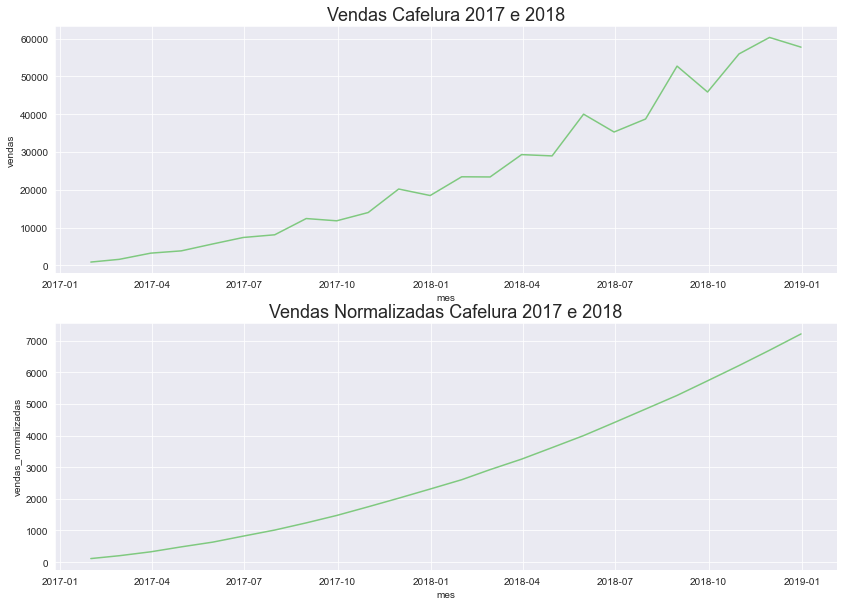

In [73]:
plt.figure(figsize = (14,10))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018',fontsize = 18)
sns.lineplot(x='mes',y='vendas',data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018',fontsize = 18)
sns.lineplot(x='mes',y='vendas_normalizadas',data=cafelura)
ax = ax

## Statsmodel

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

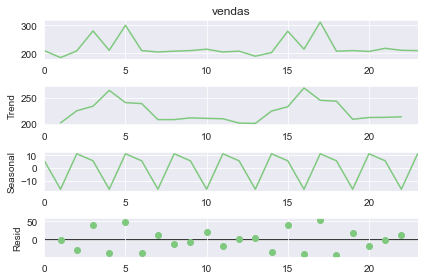

In [75]:
resultado = seasonal_decompose(chocolura['vendas'],period=3)
ax = resultado.plot()

In [76]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [77]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


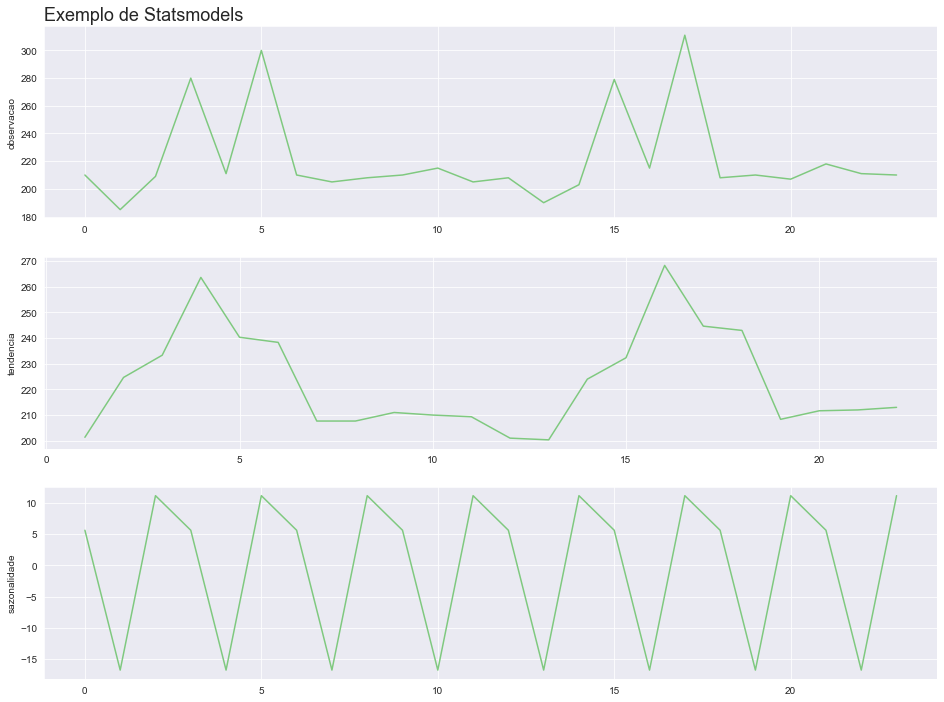

In [78]:
plot_comparacao(resultado.index,'observacao','tendencia','sazonalidade',
                resultado, 'Exemplo de Statsmodels')

# Ruidos e media móvel

## Ruido de uma time series

### alucel análise de vendas

In [80]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [81]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [82]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [83]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [84]:
print(f'O data frame tem {alucel.shape[0]} linhas e {alucel.shape[1]} colunas')
print(f'Quantidade de dados nulos :{alucel.isna().sum().sum()}')

O data frame tem 61 linhas e 2 colunas
Quantidade de dados nulos :0


In [86]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


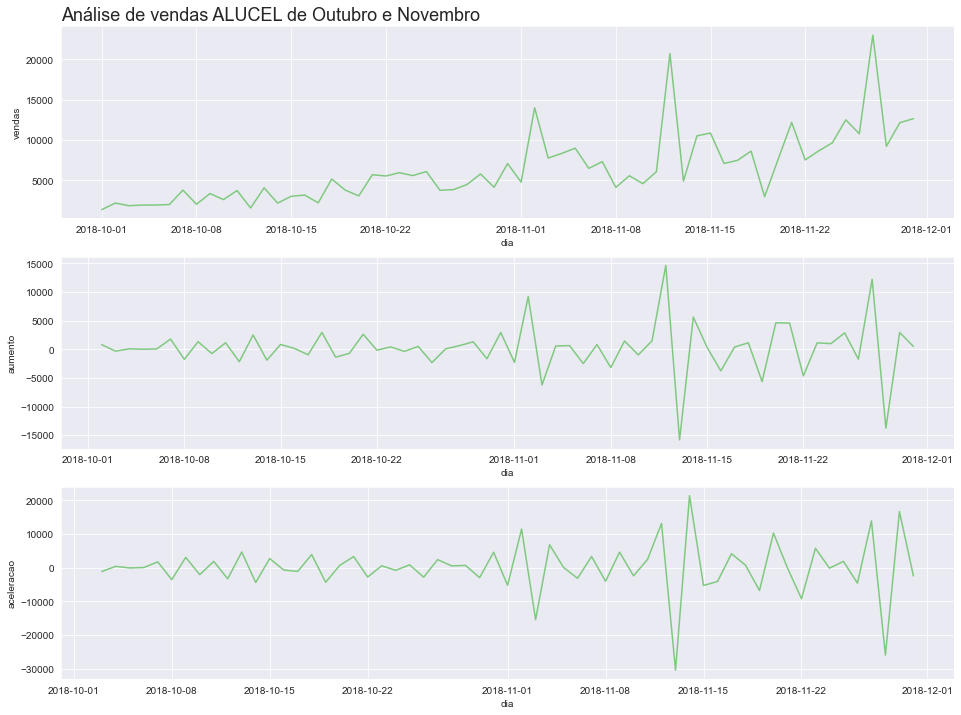

In [87]:
plot_comparacao('dia','vendas','aumento','aceleracao',
                alucel,'Análise de vendas ALUCEL de Outubro e Novembro')

## Média Móvel

In [88]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [90]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


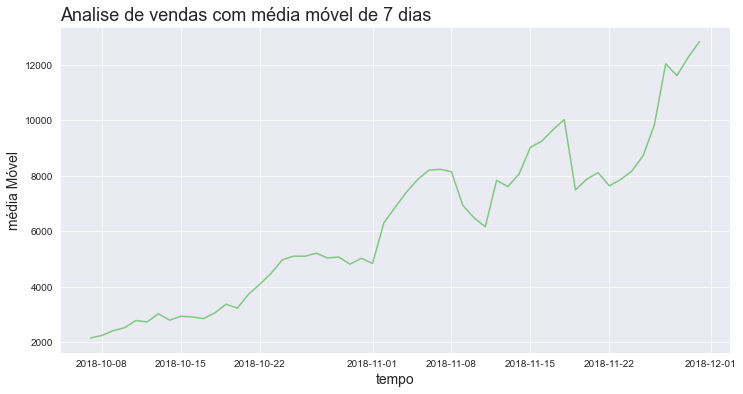

In [91]:
plotar('Analise de vendas com média móvel de 7 dias','tempo','média Móvel','dia','media_movel',alucel)

In [92]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean() 

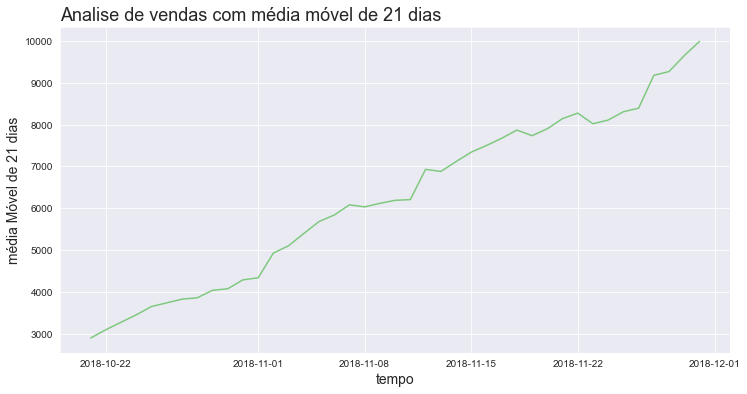

In [93]:
plotar('Analise de vendas com média móvel de 21 dias','tempo','média Móvel de 21 dias','dia','media_movel_21',alucel)

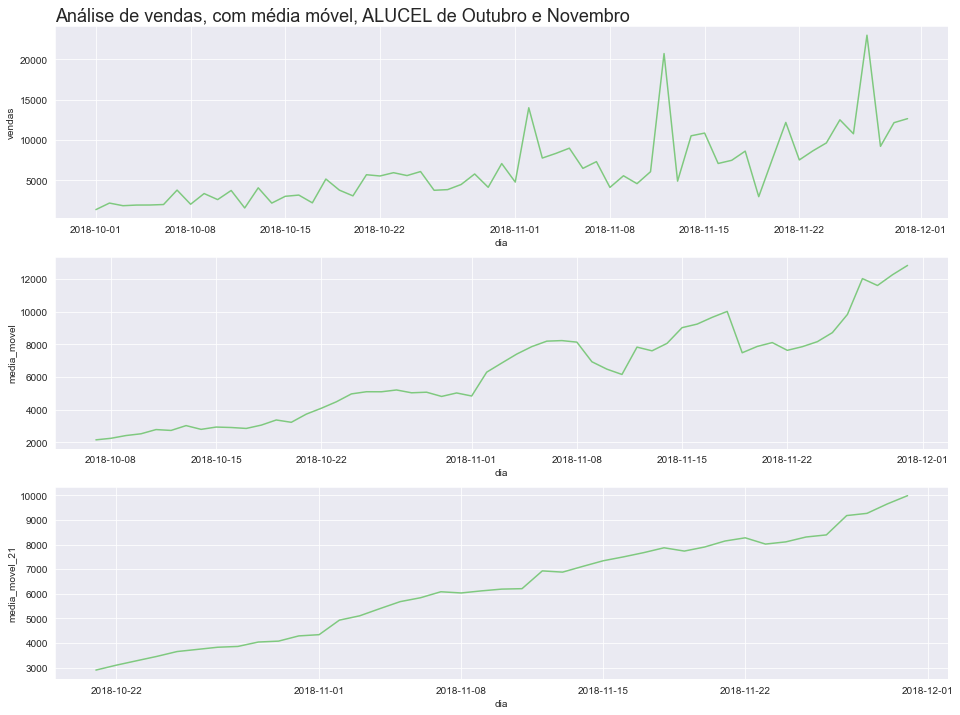

In [94]:
plot_comparacao('dia','vendas','media_movel','media_movel_21',
                alucel,'Análise de vendas, com média móvel, ALUCEL de Outubro e Novembro')